In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

### Analysing Dataset

In [3]:
imdb_reviews = pd.read_csv('tmdb_5000_movies.csv')
imdb_reviews

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
imdb_reviews.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
imdb_reviews['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

### Converting JSON string to its actual type (list containing dictionary)

In [7]:
print(imdb_reviews['genres'][0])

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]


In [8]:
ast.literal_eval(imdb_reviews['keywords'][0])[0]

{'id': 1463, 'name': 'culture clash'}

In [9]:
imdb_reviews['genres'] = imdb_reviews['genres'].apply(lambda x : ast.literal_eval(x))

In [10]:
type(imdb_reviews['genres'][0])

list

In [11]:
imdb_reviews['keywords'] = imdb_reviews['keywords'].apply(lambda x : ast.literal_eval(x))
imdb_reviews['production_countries'] = imdb_reviews['production_countries'].apply(lambda x : ast.literal_eval(x))
imdb_reviews['production_companies'] = imdb_reviews['production_companies'].apply(lambda x : ast.literal_eval(x))
imdb_reviews['spoken_languages'] = imdb_reviews['spoken_languages'].apply(lambda x : ast.literal_eval(x))

### Filling NaN values with blank space for String type columns

In [12]:
imdb_reviews['overview'] = imdb_reviews['overview'].fillna(" ")
imdb_reviews['tagline'] = imdb_reviews['tagline'].fillna(" ")

In [13]:
imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Extracting "name" labeled data from the dictionary and converting to string

In [14]:
def extract_name(x_list : list) -> str:
    
    string = ""
    
    for dicitonary in x_list:
        string = string + dicitonary['name'] + " "
    
    return string

In [15]:
imdb_reviews['genres'] = imdb_reviews['genres'].apply(extract_name)

In [16]:
imdb_reviews['genres']

0       Action Adventure Fantasy Science Fiction 
1                       Adventure Fantasy Action 
2                         Action Adventure Crime 
3                    Action Crime Drama Thriller 
4               Action Adventure Science Fiction 
                          ...                    
4798                       Action Crime Thriller 
4799                              Comedy Romance 
4800               Comedy Drama Romance TV Movie 
4801                                             
4802                                 Documentary 
Name: genres, Length: 4803, dtype: object

In [17]:
imdb_reviews['keywords'] = imdb_reviews['keywords'].apply(extract_name)
imdb_reviews['production_countries'] = imdb_reviews['production_countries'].apply(extract_name)
imdb_reviews['production_companies'] = imdb_reviews['production_companies'].apply(extract_name)
imdb_reviews['spoken_languages'] = imdb_reviews['spoken_languages'].apply(extract_name)

In [18]:
imdb_reviews

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners Twentieth Century Fox ...,United States of America United Kingdom,2009-12-10,2787965087,162.0,English Español,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures Jerry Bruckheimer Films S...,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6 bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures Danjaq B24,United Kingdom United States of America,2015-10-26,880674609,148.0,Français English Español Italiano Deutsch,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures Warner Bros. DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,Action Crime Thriller,NaN,9367,united states–mexico barrier legs arms paper k...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,Mexico United States of America,1992-09-04,2040920,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,Comedy Romance,NaN,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,,,2011-12-26,0,85.0,,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,Front Street Pictures Muse Entertainment Enter...,United States of America,2013-10-13,0,120.0,English,Released,,"Signed, Sealed, Delivered",7.0,6
4801,0,,http://shanghaicalling.com/,126186,,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,,United States of America China,2012-05-03,0,98.0,English,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


### Features to consider

In [19]:
imdb_reviews['Text'] = imdb_reviews['genres'] + " " + imdb_reviews['keywords'] + " " + imdb_reviews['original_language'] + " " + imdb_reviews['original_title'] + " " + imdb_reviews['production_companies'] + imdb_reviews['production_countries'] + imdb_reviews['spoken_languages'] + imdb_reviews['title'] + " " + imdb_reviews['overview'] + " " + imdb_reviews['tagline']

In [20]:
imdb_reviews['Text']

0       Action Adventure Fantasy Science Fiction  cult...
1       Adventure Fantasy Action  ocean drug abuse exo...
2       Action Adventure Crime  spy based on novel sec...
3       Action Crime Drama Thriller  dc comics crime f...
4       Action Adventure Science Fiction  based on nov...
                              ...                        
4798    Action Crime Thriller  united states–mexico ba...
4799    Comedy Romance   en Newlyweds Newlyweds A newl...
4800    Comedy Drama Romance TV Movie  date love at fi...
4801      en Shanghai Calling United States of America...
4802    Documentary  obsession camcorder crush dream g...
Name: Text, Length: 4803, dtype: object

### Using TF-IDF to vectorise the text we have

In [21]:
vectoriser = TfidfVectorizer(stop_words='english')

In [22]:
X = imdb_reviews['Text']

In [23]:
X_tfidf = vectoriser.fit_transform(X)
X_tfidf

<4803x27305 sparse matrix of type '<class 'numpy.float64'>'
	with 250895 stored elements in Compressed Sparse Row format>

In [24]:
X_tfidf.shape

(4803, 27305)

In [25]:
X_tfidf[0]

<1x27305 sparse matrix of type '<class 'numpy.float64'>'
	with 62 stored elements in Compressed Sparse Row format>

In [26]:
X_tfidf[0].dot(X_tfidf[0].T).todense()

matrix([[1.]])

In [27]:
X_tfidf[0].dot(X_tfidf[5].T).todense() *100

matrix([[4.4137747]])

In [28]:
vectoriser.vocabulary_

{'action': 593,
 'adventure': 718,
 'fantasy': 8891,
 'science': 21280,
 'fiction': 9127,
 'culture': 6017,
 'clash': 4723,
 'future': 9921,
 'space': 22607,
 'war': 26247,
 'colony': 5017,
 'society': 22439,
 'travel': 24848,
 'futuristic': 9924,
 'romance': 20670,
 'alien': 974,
 'tribe': 24920,
 'planet': 18407,
 'cgi': 4236,
 'marine': 15050,
 'soldier': 22480,
 'battle': 2360,
 'love': 14560,
 'affair': 752,
 'anti': 1319,
 'power': 18751,
 'relations': 19989,
 'mind': 15726,
 'soul': 22574,
 '3d': 301,
 'en': 8070,
 'avatar': 1947,
 'ingenious': 12389,
 'film': 9182,
 'partners': 17810,
 'twentieth': 25147,
 'century': 4215,
 'fox': 9663,
 'corporation': 5594,
 'dune': 7618,
 'entertainment': 8221,
 'lightstorm': 14254,
 'united': 25438,
 'states': 22978,
 'america': 1110,
 'kingdom': 13543,
 'english': 8156,
 'español': 8383,
 '22nd': 253,
 'paraplegic': 17740,
 'dispatched': 7089,
 'moon': 16041,
 'pandora': 17679,
 'unique': 25434,
 'mission': 15837,
 'torn': 24630,
 'followin

### Creating dictionary for title index mapping

In [29]:
title_to_index = {}

for i in range(len(imdb_reviews.index)) :
    title_to_index[imdb_reviews['title'].loc[i]] = i

title_to_index

{'Avatar': 0,
 "Pirates of the Caribbean: At World's End": 1,
 'Spectre': 2,
 'The Dark Knight Rises': 3,
 'John Carter': 4,
 'Spider-Man 3': 5,
 'Tangled': 6,
 'Avengers: Age of Ultron': 7,
 'Harry Potter and the Half-Blood Prince': 8,
 'Batman v Superman: Dawn of Justice': 9,
 'Superman Returns': 10,
 'Quantum of Solace': 11,
 "Pirates of the Caribbean: Dead Man's Chest": 12,
 'The Lone Ranger': 13,
 'Man of Steel': 14,
 'The Chronicles of Narnia: Prince Caspian': 15,
 'The Avengers': 16,
 'Pirates of the Caribbean: On Stranger Tides': 17,
 'Men in Black 3': 18,
 'The Hobbit: The Battle of the Five Armies': 19,
 'The Amazing Spider-Man': 20,
 'Robin Hood': 21,
 'The Hobbit: The Desolation of Smaug': 22,
 'The Golden Compass': 23,
 'King Kong': 24,
 'Titanic': 25,
 'Captain America: Civil War': 26,
 'Battleship': 27,
 'Jurassic World': 28,
 'Skyfall': 29,
 'Spider-Man 2': 30,
 'Iron Man 3': 31,
 'Alice in Wonderland': 32,
 'X-Men: The Last Stand': 33,
 'Monsters University': 34,
 'Tra

### Checking the recommendations for the movie searched for using cosine similarity

In [30]:
movie_index = title_to_index["Pirates of the Caribbean: At World's End"]

In [31]:
score = cosine_similarity(X_tfidf[movie_index],X_tfidf)
score

array([[0.03070835, 1.        , 0.01533441, ..., 0.02096467, 0.02430281,
        0.01408518]])

In [32]:
scores = score.flatten()

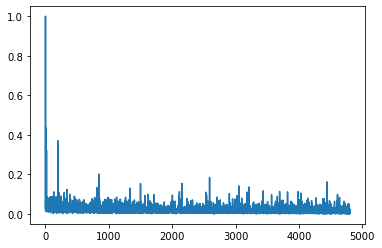

In [33]:
plt.plot(scores)

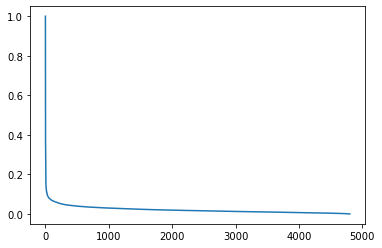

In [34]:
plt.plot(scores[(-scores).argsort()])

### Our Top 5 recommendations

In [35]:
recommend_idx = (-scores).argsort()[1:6]
imdb_reviews['title'].loc[recommend_idx]

12             Pirates of the Caribbean: Dead Man's Chest
199     Pirates of the Caribbean: The Curse of the Bla...
17            Pirates of the Caribbean: On Stranger Tides
848         The Pirates! In an Adventure with Scientists!
2590       VeggieTales: The Pirates Who Don't Do Anything
Name: title, dtype: object

### Now we will see the above results for euclidean distance

In [36]:
score = euclidean_distances(X_tfidf[movie_index],X_tfidf)
score

array([[1.39233017, 0.        , 1.40332861, ..., 1.39931078, 1.39692318,
        1.40421851]])

In [37]:
scores = score.flatten()

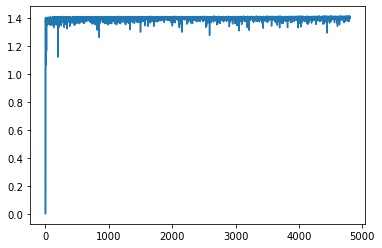

In [38]:
plt.plot(scores)

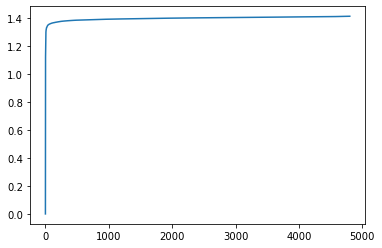

In [40]:
plt.plot(scores[scores.argsort()])

In [41]:
recommend_idx = scores.argsort()[1:6]
imdb_reviews['title'].loc[recommend_idx]

12             Pirates of the Caribbean: Dead Man's Chest
199     Pirates of the Caribbean: The Curse of the Bla...
17            Pirates of the Caribbean: On Stranger Tides
848         The Pirates! In an Adventure with Scientists!
2590       VeggieTales: The Pirates Who Don't Do Anything
Name: title, dtype: object